# Decoding Health Patterns with Advanced Neural Networks for Stroke Prediction

## Introduction

**In this project,focused on predicting strokes, sophisticated artificial neural networks (ANNs) are utilized to construct a model that gauges the likelihood of individuals experiencing a stroke. The project utilizes a dataset enriched with diverse health-related features, with the primary objective of employing deep learning to unveil intricate patterns and relationships within the data. Through the training of an ANN model, the project seeks to establish a resilient predictive tool adept at accurately pinpointing potential stroke risks. To assess the model's performance comprehensively, evaluation metrics like the Receiver Operating Characteristic (ROC) curve and the Area Under the ROC Curve (AUC) are employed, ensuring a thorough evaluation of its predictive accuracy and reliability. This initiative underscores the application of state-of-the-art deep learning techniques to enhance stroke prediction, thereby contributing to the development of more effective strategies in preventive healthcare.**

### Importing Libraries

In [309]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


### Loading Dataset

In [265]:
data=pd.read_csv(r"C:\Users\babua\OneDrive\Desktop\project 2\healthcare-dataset-stroke-data.csv")
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [266]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Data Exploration

In [267]:
data.shape

(5110, 12)

In [268]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [269]:
#unique values
l={}
for feature in data.columns:
    unique_values=data[feature].unique()
    l[feature]={"unique values":unique_values,'length of feature':len(unique_values)}
for feature,info in l.items():
    print(f"Feature: {feature}")
    print(f"Unique values: {info['unique values']}")
    print(f"Number of unique values: {info['length of feature']}")
    print("-" * 30)

Feature: id
Unique values: [ 9046 51676 31112 ... 19723 37544 44679]
Number of unique values: 5110
------------------------------
Feature: gender
Unique values: ['Male' 'Female' 'Other']
Number of unique values: 3
------------------------------
Feature: age
Unique values: [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+

### Data Cleaning 

In [270]:
#checking duplicates
data.duplicated().sum()

0

In [271]:
#checking null values
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [272]:
#dropping null values from bmi
data.dropna(inplace=True)


In [273]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [274]:
data.shape

(4909, 12)

In [275]:
#Converting 'age' column from Scientific Notation to Integer Values
data['age'] = data['age'].apply(lambda x: float(x))

In [276]:
data['age'] = data['age'].astype(int)

In [277]:
data['age'].head(10)

0     67
2     80
3     49
4     79
5     81
6     74
7     69
9     78
10    81
11    61
Name: age, dtype: int32

Now the values in age column is integer

### Feature Engineering

In [278]:
def categorize_bmi(bmi_value):
    if bmi_value < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi_value <= 24.9:
        return 'Normal Weight'
    elif 25 <= bmi_value <= 29.9:
        return 'Overweight'
    elif 30 <= bmi_value <= 34.9:
        return 'Class I Obesity'
    elif 35 <= bmi_value <= 39.9:
        return 'Class II Obesity'
    elif bmi_value >= 40:
        return 'Class III Obesity'
    else:
        return None  # Handle any unexpected values or NaNs

# Apply the categorization function to create 'bmi_category' column
data['bmi_category'] = data['bmi'].apply(categorize_bmi)

In [279]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   int32  
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
 12  bmi_category       4909 non-null   object 
dtypes: float64(2), int32(1), int64(4), object(6)
memory usage: 517.7+ KB


### Exploratory Data Analysis

In [280]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'bmi_category'],
      dtype='object')

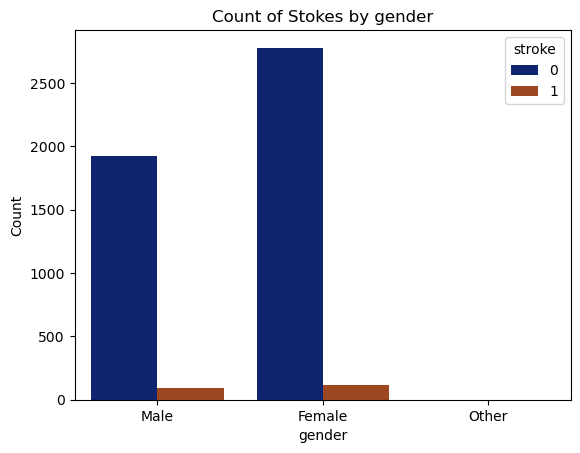

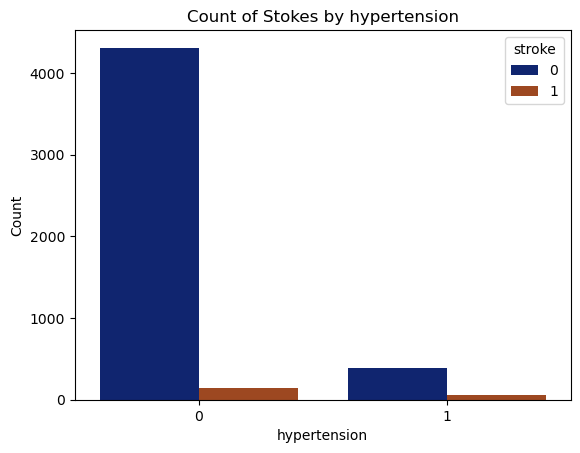

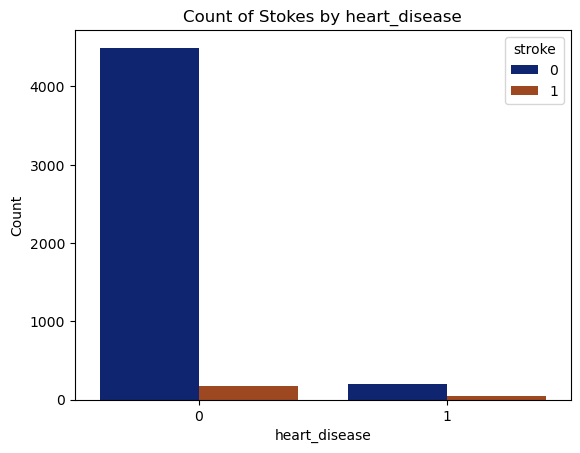

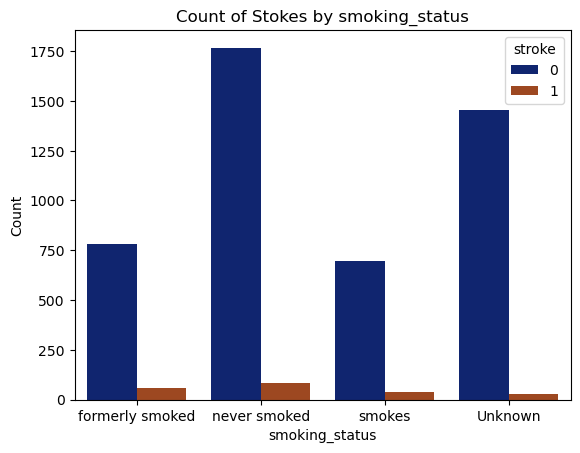

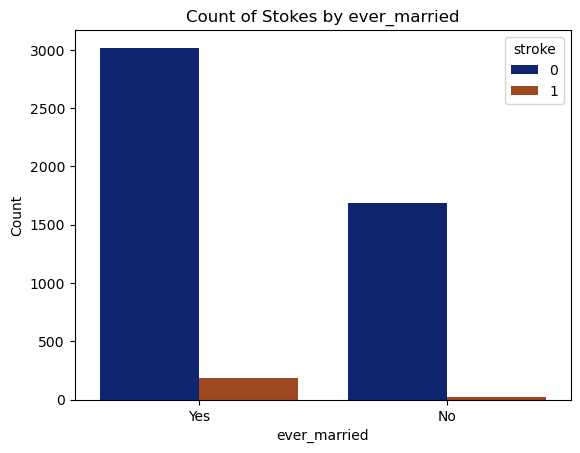

In [281]:
#distribution of stoke 
col=['gender','hypertension','heart_disease','smoking_status','ever_married']
for i in col:
    sns.countplot(x=data[i],hue=data.stroke,palette='dark')
    plt.title(f'Count of Stokes by {i}')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()

*The visualization unmistakably shows a slightly elevated stroke rate among females compared to males. Moreover, the dataset is primarily constituted by data pertaining to females, and there are no records in the 'others' category<br>
*In the context of stroke rates categorized by hypertension, individuals with low hypertension levels tend to have fewer strokes than those with hypertension.<br>
*In the context of stroke rates categorized by heart disease, individuals without a history of heart disease tend to experience strokes at a higher rate than those with a history of heart disease.<br>
*In the analysis of stroke rates based on smoking status, individuals who have never smoked exhibit a higher occurrence of strokes, followed by those who formerly smoked. Subsequently, individuals who currently smoke show a lower stroke rate, and those with unknown smoking status have the lowest incidence of strokes.<br>
*In the analysis of stroke rates based on marital status, it is observed that married individuals tend to exhibit a higher stroke rate compared to those who are unmarried.


C:\Users\babua\AppData\Local\Temp\ipykernel_17156\4019351838.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='age',y=i,data=data,ci=None)


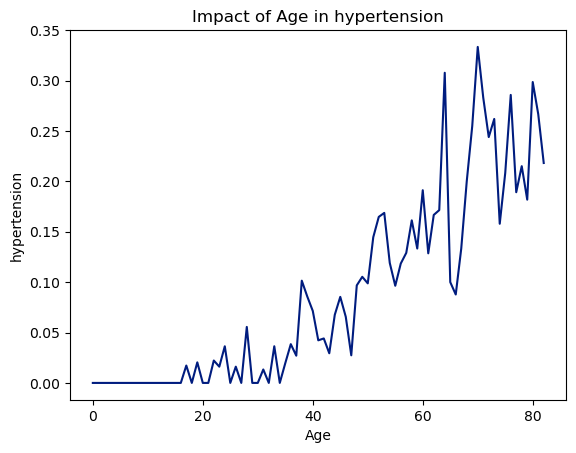

C:\Users\babua\AppData\Local\Temp\ipykernel_17156\4019351838.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='age',y=i,data=data,ci=None)


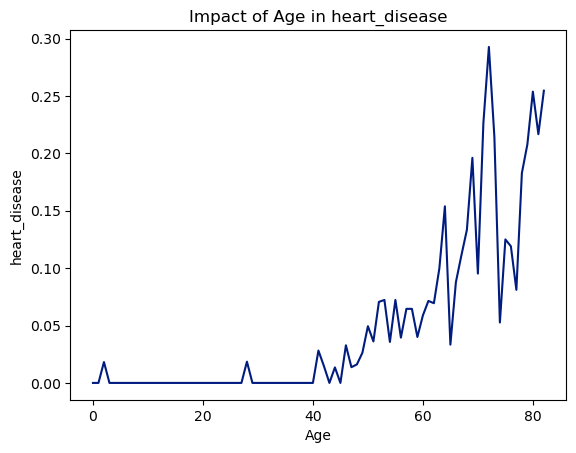

C:\Users\babua\AppData\Local\Temp\ipykernel_17156\4019351838.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='age',y=i,data=data,ci=None)


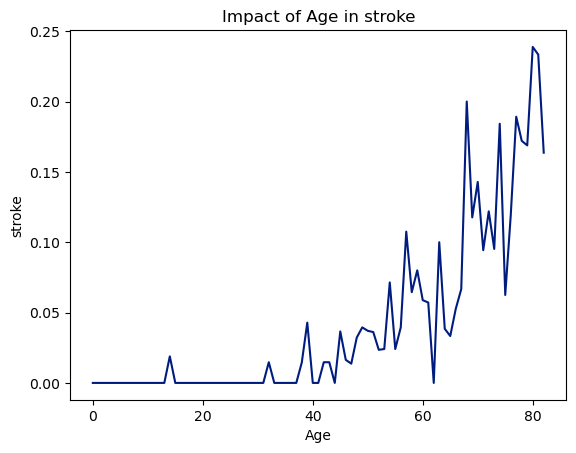

In [282]:
l=['hypertension','heart_disease','stroke']
for i in l:
    sns.set_palette('dark')
    sns.lineplot(x='age',y=i,data=data,ci=None)
    plt.title(f"Impact of Age in {i}")
    plt.xlabel("Age")
    plt.ylabel(i)
    plt.show()

As age increases, there is a corresponding rise in the rates of stroke, hypertension, and heart disease. This suggests a potential age-related association with these health conditions, emphasizing the importance of age-aware healthcare strategies and preventive measures.

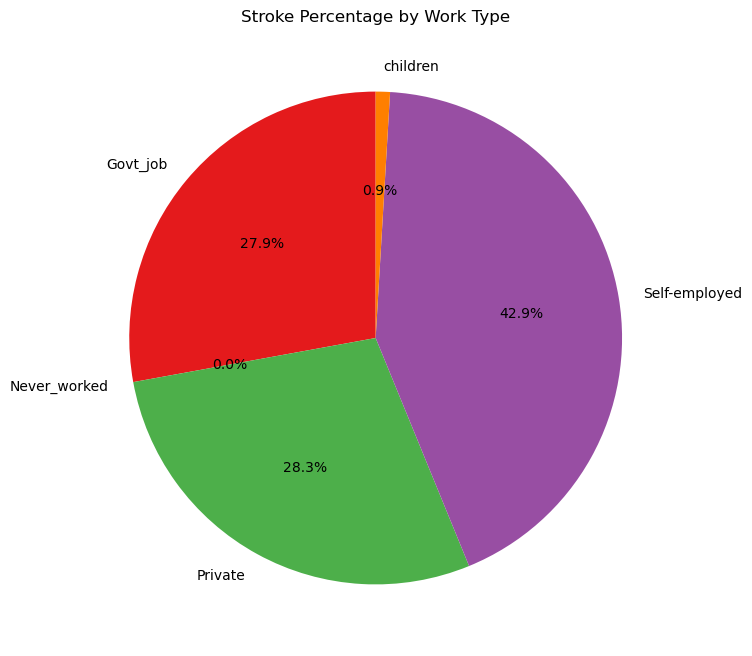

In [283]:
#Impact of stroke in work type
stroke_percentage = data.groupby('work_type')['stroke'].mean() * 100
plt.figure(figsize=(8, 8))
plt.pie(stroke_percentage, labels=stroke_percentage.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set1.colors)
plt.title('Stroke Percentage by Work Type')
plt.show()

Analyzing the pie chart reveals varying stroke rates across different work types. Notably, self-employed individuals exhibit the highest stroke rate at 42.9%, followed by those in the private sector with 28.3%. Government job holders closely follow with a stroke rate of 27.9%. The stroke rate is significantly lower for children at 0.9%, and individuals who have never worked show a 0% stroke rate. These insights underscore the importance of considering occupational factors when assessing stroke risk within different demographic groups.

C:\Users\babua\AppData\Local\Temp\ipykernel_17156\1629886003.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Residence_type', y='stroke', data=data, estimator=sum, ci=None, palette='viridis')


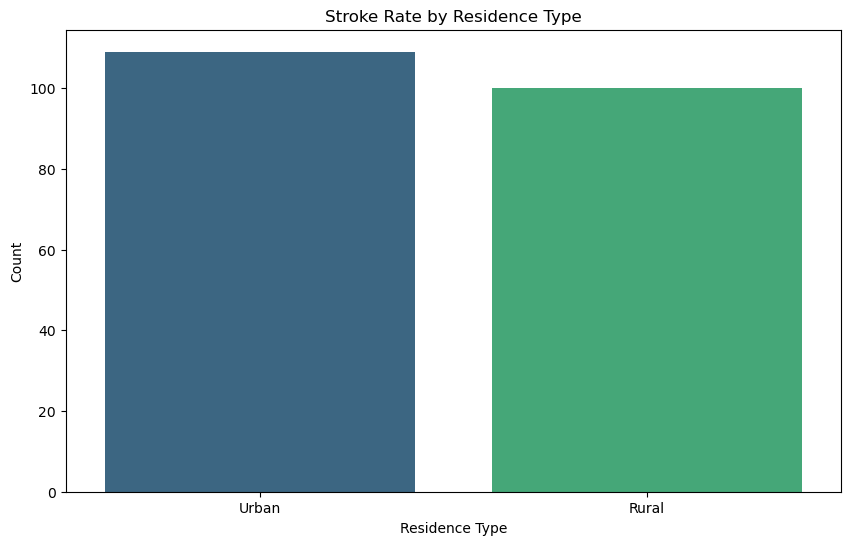

In [284]:
#Impact of stroke by area of living
plt.figure(figsize=(10, 6))
sns.barplot(x='Residence_type', y='stroke', data=data, estimator=sum, ci=None, palette='viridis')
plt.xlabel('Residence Type')
plt.ylabel('Count')
plt.title('Stroke Rate by Residence Type')
plt.show()

Analyzing stroke rates by residence type reveals a higher incidence of strokes among individuals living in urban areas compared to those in rural areas. The difference is notable, with rural areas closely following, though with a slightly lower stroke rate. These findings underscore the potential impact of residence type on stroke risk within the analyzed population.

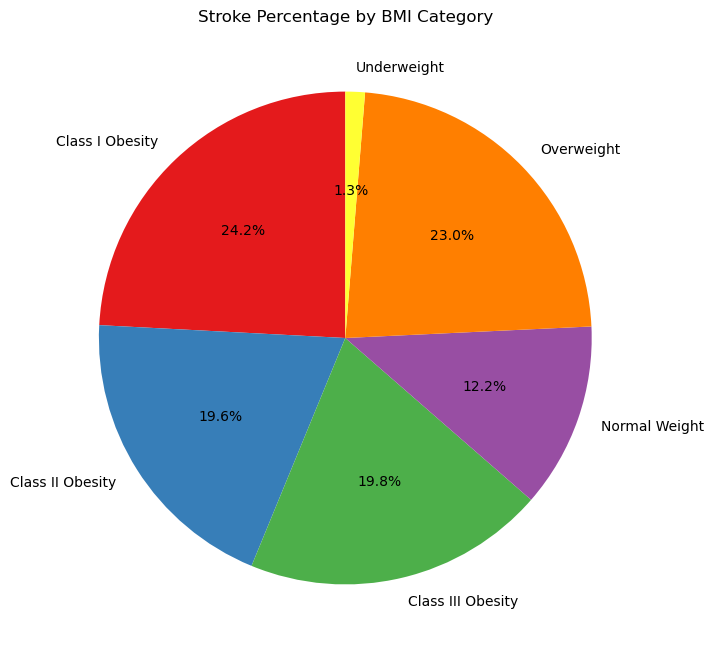

In [285]:
#Stroke Percentage by BMI Category
stroke_percentage = data.groupby('bmi_category')['stroke'].mean() * 100
plt.figure(figsize=(8, 8))
plt.pie(stroke_percentage, labels=stroke_percentage.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set1.colors)
plt.title('Stroke Percentage by BMI Category')
plt.show()

When analyzing the stroke rate by BMI category, individuals classified as Class I Obesity exhibit a higher stroke rate compared to other categories, accounting for 24.2%. Following closely, the overweight category shows a stroke rate of 23.0%. Subsequently, Class III Obesity and Class II Obesity report stroke rates of 19.8% and 19.6%, respectively. Normal Weight individuals display a lower stroke rate at 12.2%, while the Underweight category has the lowest stroke rate at 1.3%.

### Data Preprocessing

In [286]:
#removing feature bmi_category used for eda
data.drop('bmi_category',axis=1,inplace=True)

In [287]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.854145,0.091872,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.575986,0.288875,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


C:\Users\babua\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


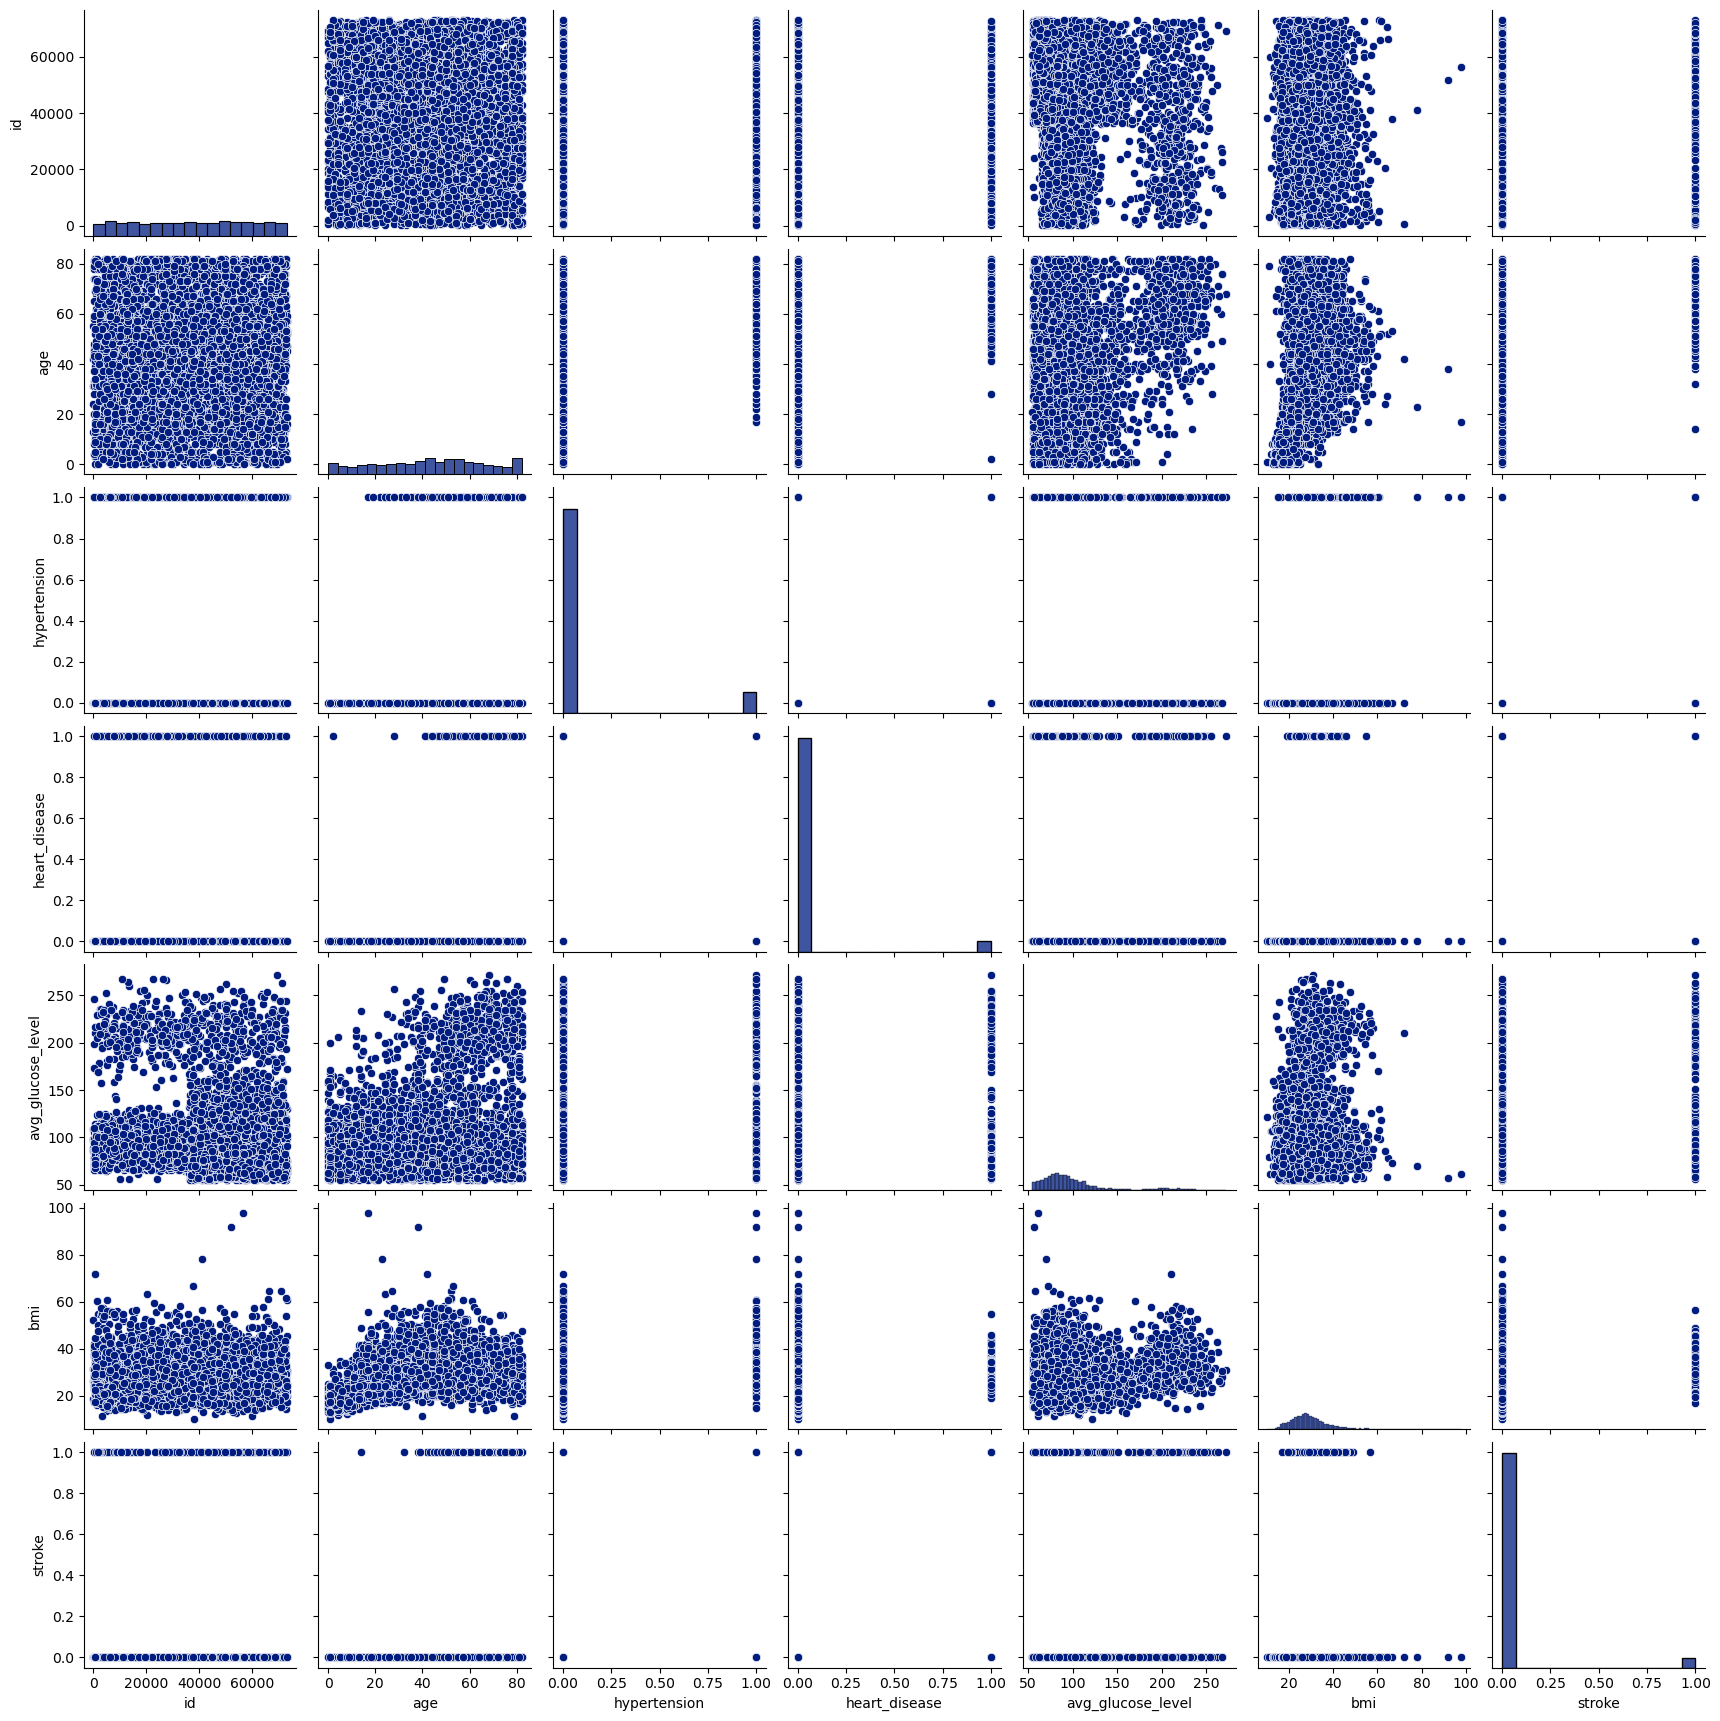

In [288]:
#visually representing outliers in the dataset
sns.pairplot(data)
plt.show()

In the process of outlier detection within the BMI distribution, values exceeding 80 have been identified as notable outliers. These extreme BMI values, indicative of morbid obesity, demand careful consideration in the analysis. The presence of such outliers signals potential anomalies or unique characteristics within the dataset, emphasizing the need for further scrutiny. Validation of the accuracy of these extreme values is imperative, as they may significantly impact statistical analyses and interpretations. Addressing these outliers will contribute to a more accurate understanding of the BMI distribution and its implications for health within the studied population.

In [289]:
#removing outliers
data=data[data['bmi']<80]
data.shape

(4907, 12)

#### Treating Categorical Values

In [290]:
object_columns = data.select_dtypes(include=['object'])
oc=list(object_columns.columns)
oc

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [291]:
le=LabelEncoder()
for i in oc:
    data[i]=le.fit_transform(data[i])



In [292]:
data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67,0,1,1,2,1,228.69,36.6,1,1
2,31112,1,80,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79,1,0,1,3,0,174.12,24.0,2,1
5,56669,1,81,0,0,1,2,1,186.21,29.0,1,1


#### Feature Scaling

In [293]:
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(data)
scaled_data=pd.DataFrame(scaled_data,columns=data.columns)

In [294]:
scaled_data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.123094,0.5,0.817073,0.0,1.0,1.0,0.50,1.0,0.801265,0.388479,0.333333,1.0
1,0.425936,0.5,0.975610,0.0,1.0,1.0,0.50,0.0,0.234512,0.327917,0.666667,1.0
2,0.824904,0.0,0.597561,0.0,0.0,1.0,0.50,1.0,0.536008,0.355982,1.000000,1.0
3,0.021794,0.0,0.963415,1.0,0.0,1.0,0.75,0.0,0.549349,0.202363,0.666667,1.0
4,0.776691,0.5,0.987805,0.0,0.0,1.0,0.50,1.0,0.605161,0.276219,0.333333,1.0


### Correlation

In [295]:
cor=scaled_data.corr()

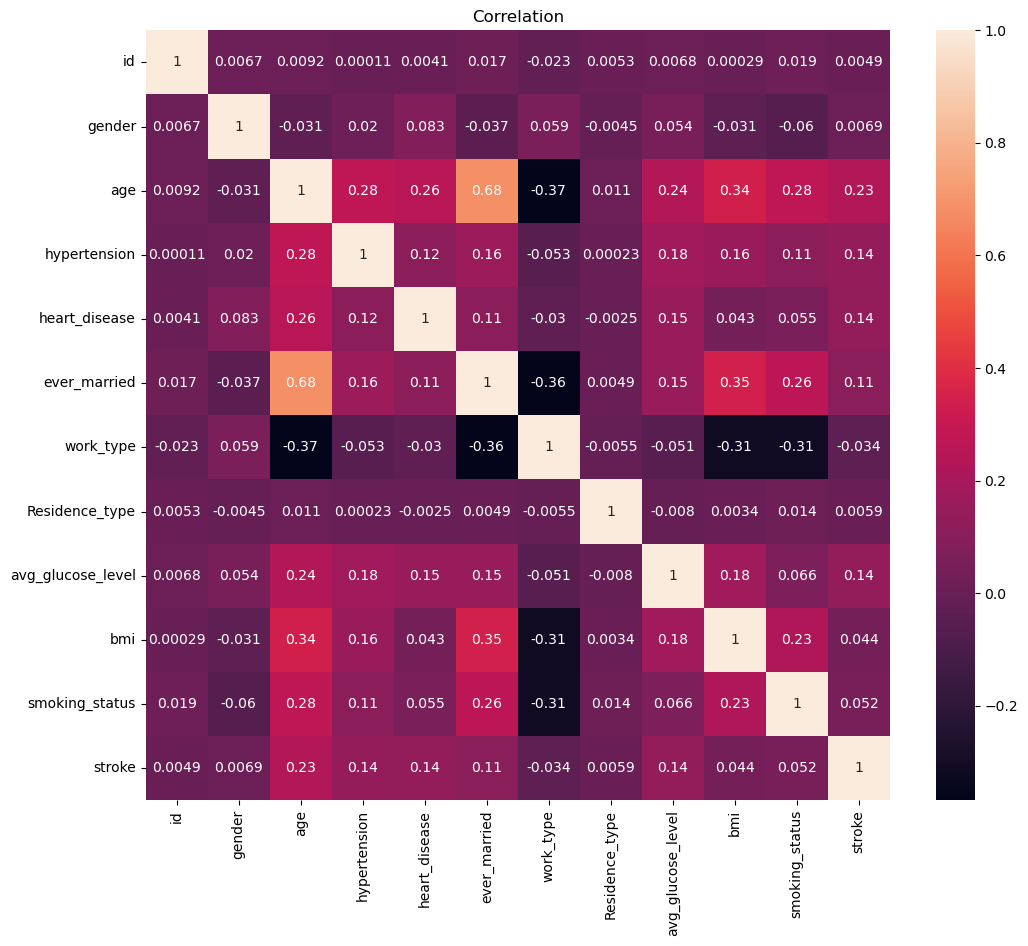

In [296]:
plt.figure(figsize=(12, 10))
sns.heatmap(cor,annot=True)
plt.title('Correlation')
plt.show()


Moderate Positive Correlation(as one variable increases, the other variable also increases moderately): The variable age exhibits a moderate positive correlation.

Weak Correlations(linear relationship between the two variables is weak): The variables id, gender, hypertension, heart disease, ever married, work type, residence type, avg glucose level, bmi, and smoking status show weak correlations with each other.

In [297]:
#dropping id from the data set
scaled_data=scaled_data.drop('id',axis=1)

In [298]:
scaled_data.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.5,0.817073,0.0,1.0,1.0,0.50,1.0,0.801265,0.388479,0.333333,1.0
1,0.5,0.975610,0.0,1.0,1.0,0.50,0.0,0.234512,0.327917,0.666667,1.0
2,0.0,0.597561,0.0,0.0,1.0,0.50,1.0,0.536008,0.355982,1.000000,1.0
3,0.0,0.963415,1.0,0.0,1.0,0.75,0.0,0.549349,0.202363,0.666667,1.0
4,0.5,0.987805,0.0,0.0,1.0,0.50,1.0,0.605161,0.276219,0.333333,1.0


While the initial correlation analysis indicated predominantly weak correlations between features, a deeper dive into exploratory data analysis (EDA) uncovered the nuanced importance of seemingly weakly correlated features in predicting strokes. Notably, the 'id' column was deemed less relevant and has been dropped. This underlines the significance of leveraging domain knowledge and thorough EDA to discern the true predictive power of features beyond their initial correlation values.

In [302]:
#splitting training and testing data
X=scaled_data.drop('stroke',axis=1)
y=scaled_data['stroke']

In [331]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=70)

## Building Model

In [332]:
# Define early stopping callback
early_stopping=EarlyStopping(monitor='val_loss',patience=50,restore_best_weights=True)

In [340]:
# Initialising ANN
model=Sequential()
model.add(Dense(32, input_dim=10, activation='relu', kernel_initializer = 'uniform')) #input layer
model.add(Dense(16, activation='relu', kernel_initializer = 'uniform')) #hidden layer
model.add(Dropout(0.25))# dropout regularization
model.add(Dense(8, activation='relu', kernel_initializer = 'uniform'))
model.add(Dropout(0.1))
model.add(Dense(4, activation='relu', kernel_initializer = 'uniform'))
model.add(Dropout(0.05))
model.add(Dense(1, activation='relu', kernel_initializer = 'uniform')) #output layer

# Compling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history=model.fit(X_train, y_train, epochs=500, batch_size=50, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/500
59/59 [==============================] - 1s 4ms/step - loss: 0.2639 - accuracy: 0.9528 - val_loss: 0.2047 - val_accuracy: 0.9606
Epoch 2/500
59/59 [==============================] - 0s 2ms/step - loss: 0.2386 - accuracy: 0.9528 - val_loss: 0.1890 - val_accuracy: 0.9606
Epoch 3/500
59/59 [==============================] - 0s 2ms/step - loss: 0.1969 - accuracy: 0.9528 - val_loss: 0.1585 - val_accuracy: 0.9606
Epoch 4/500
59/59 [==============================] - 0s 2ms/step - loss: 0.1804 - accuracy: 0.9528 - val_loss: 0.1561 - val_accuracy: 0.9606
Epoch 5/500
59/59 [==============================] - 0s 2ms/step - loss: 0.1774 - accuracy: 0.9528 - val_loss: 0.1530 - val_accuracy: 0.9606
Epoch 6/500
59/59 [==============================] - 0s 2ms/step - loss: 0.1714 - accuracy: 0.9528 - val_loss: 0.1511 - val_accuracy: 0.9606
Epoch 7/500
59/59 [==============================] - 0s 2ms/step - loss: 0.1668 - accuracy: 0.9528 - val_loss: 0.1516 - val_accuracy: 0.9606
Epoch 8/500
5

Epoch 59/500
59/59 [==============================] - 0s 2ms/step - loss: 0.1532 - accuracy: 0.9531 - val_loss: 0.1400 - val_accuracy: 0.9606
Epoch 60/500
59/59 [==============================] - 0s 1ms/step - loss: 0.1513 - accuracy: 0.9528 - val_loss: 0.1398 - val_accuracy: 0.9606
Epoch 61/500
59/59 [==============================] - 0s 2ms/step - loss: 0.1528 - accuracy: 0.9531 - val_loss: 0.1381 - val_accuracy: 0.9606
Epoch 62/500
59/59 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9528 - val_loss: 0.1385 - val_accuracy: 0.9606
Epoch 63/500
59/59 [==============================] - 0s 2ms/step - loss: 0.1506 - accuracy: 0.9528 - val_loss: 0.1371 - val_accuracy: 0.9606
Epoch 64/500
59/59 [==============================] - 0s 2ms/step - loss: 0.1524 - accuracy: 0.9528 - val_loss: 0.1368 - val_accuracy: 0.9606
Epoch 65/500
59/59 [==============================] - 0s 2ms/step - loss: 0.1542 - accuracy: 0.9528 - val_loss: 0.1365 - val_accuracy: 0.9606
Epoch 

59/59 [==============================] - 0s 2ms/step - loss: 0.1478 - accuracy: 0.9518 - val_loss: 0.1411 - val_accuracy: 0.9606
Epoch 117/500
59/59 [==============================] - 0s 2ms/step - loss: 0.1475 - accuracy: 0.9524 - val_loss: 0.1408 - val_accuracy: 0.9606
Epoch 118/500
59/59 [==============================] - 0s 1ms/step - loss: 0.1457 - accuracy: 0.9528 - val_loss: 0.1423 - val_accuracy: 0.9606
Epoch 119/500
59/59 [==============================] - 0s 2ms/step - loss: 0.1471 - accuracy: 0.9521 - val_loss: 0.1411 - val_accuracy: 0.9606
Epoch 120/500
59/59 [==============================] - 0s 2ms/step - loss: 0.1448 - accuracy: 0.9531 - val_loss: 0.1403 - val_accuracy: 0.9606
Epoch 121/500
59/59 [==============================] - 0s 1ms/step - loss: 0.1443 - accuracy: 0.9524 - val_loss: 0.1450 - val_accuracy: 0.9606
Epoch 122/500
59/59 [==============================] - 0s 1ms/step - loss: 0.1532 - accuracy: 0.9531 - val_loss: 0.1394 - val_accuracy: 0.9606
Epoch 123/500

### Evaluation

39/39 [==============================] - 0s 963us/step


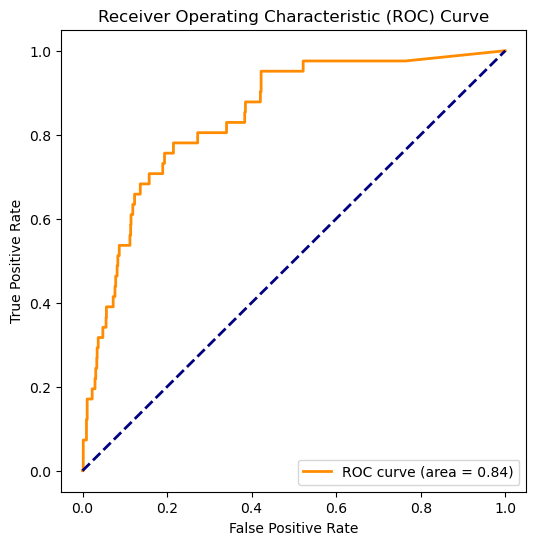

In [341]:
y_pred = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [343]:
y_pred_prob = model.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print('ROC AUC SCORE : ',roc_auc)

39/39 [==============================] - 0s 995us/step
ROC AUC SCORE :  0.8438695348167647


In [337]:
val_acbcuracy=np.mean(history.history['val_accuracy'])
print('val_accuracy : ',val_accuracy)

val_accuracy :  0.960572177509092


## Conclusion

**To conclude, this stroke prediction project leverages advanced artificial neural networks (ANNs) to develop a robust model that assesses the likelihood of strokes based on diverse health-related features. The utilization of deep learning techniques enhances the model's ability to discern intricate patterns and relationships within the dataset, thereby improving the precision of the predictive tool. Crucial evaluation metrics, such as the Receiver Operating Characteristic (ROC) curve and the Area Under the ROC Curve (AUC), are instrumental in appraising the model's efficacy. With an commendable ROC AUC score of 0.8438, the model exhibits satisfactory performance, affirming its proficiency in distinguishing between positive and negative instances.**